In [1]:
#loading necessary packages
options(scipen=999)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(cowplot))

Warning message:
“package ‘data.table’ was built under R version 4.2.2”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘ggpubr’ was built under R version 4.2.3”


In [2]:
#GC correction
#reading unreplicated signals file
unrep_diam18_diam22_gc <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_diam18_diam22.txt", header = TRUE)
unrep_diam18_t2dggi_gc <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_diam18_t2dggi.txt", header = TRUE)
unrep_diam22_t2dggi_gc <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-22/new_analysis_unreplicated_diam22_t2dggi.txt", header = TRUE)
#LD-scores
diam18_ld_scores <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/diamante18_EUR_LD_scores.txt", header = TRUE)
diam18_ld_scores <- diam18_ld_scores %>% rename(SNP = id)
diam22_ld_scores <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-22/diamante22_EUR_LD_scores.txt", header = TRUE)

#LDSR intercept correction
#reading unreplicated files
unrep_diam18_diam22_ldsr <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_ldsr_intercept_diam18_diam22.txt", header = TRUE)
unrep_diam18_t2dggi_ldsr <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-18/new_analysis_unreplicated_ldsr_intercept_diam18_t2dggi.txt", header = TRUE)
unrep_diam22_t2dggi_ldsr <- fread("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/independent_signals_analysis/DIAMANTE-22/new_analysis_unreplicated_ldsr_intercept_diam22_t2dggi.txt", header = TRUE)

In [3]:
#LD_scores
unrep_diam18_diam22_gc_ld <- inner_join(unrep_diam18_diam22_gc, diam18_ld_scores, by = "SNP")
unrep_diam18_t2dggi_gc_ld <- inner_join(unrep_diam18_t2dggi_gc, diam18_ld_scores, by = "SNP")
unrep_diam18_diam22_ldsr_ld <- inner_join(unrep_diam18_diam22_ldsr, diam18_ld_scores, by = "SNP")
unrep_diam18_t2dggi_ldsr_ld <- inner_join(unrep_diam18_t2dggi_ldsr, diam18_ld_scores, by = "SNP")
unrep_diam22_t2dggi_gc_ld <- inner_join(unrep_diam22_t2dggi_gc, diam22_ld_scores, by = "rsID")
unrep_diam22_t2dggi_ldsr_ld <- inner_join(unrep_diam22_t2dggi_ldsr, diam22_ld_scores, by = "rsID")

### As the lambda value is higher than LDSR intercept, there are SNPs which are uniquely lost to GC correction
### SNPs lost to LDSR intercept correction are a subset of the SNPs lost to GC correction

In [4]:
#SNPs that are lost in GC correction but not in LDSR intercept correction, i.e. unique to GC correction
uniq_unrep_diam18_diam22_gc <- anti_join(unrep_diam18_diam22_gc, unrep_diam18_diam22_ldsr, by = "SNP")
uniq_unrep_diam18_t2dggi_gc <- anti_join(unrep_diam18_t2dggi_gc, unrep_diam18_t2dggi_ldsr, by = "SNP")
uniq_unrep_diam22_t2dggi_gc <- anti_join(unrep_diam22_t2dggi_gc, unrep_diam22_t2dggi_ldsr, by = "chrposID")
#for LD scores
uniq_unrep_diam18_diam22_gc_ld <- anti_join(unrep_diam18_diam22_gc_ld, unrep_diam18_diam22_ldsr_ld, by = "SNP")
uniq_unrep_diam18_t2dggi_gc_ld <- anti_join(unrep_diam18_t2dggi_gc_ld, unrep_diam18_t2dggi_ldsr_ld, by = "SNP")
uniq_unrep_diam22_t2dggi_gc_ld <- anti_join(unrep_diam22_t2dggi_gc_ld, unrep_diam22_t2dggi_ldsr_ld, by = "chrposID")

In [5]:
#calculating MAF
uniq_unrep_diam18_diam22_gc <- uniq_unrep_diam18_diam22_gc %>%
  mutate(MAF = ifelse(EAF > 0.5, 1 - EAF, EAF))

unrep_diam18_diam22_ldsr <- unrep_diam18_diam22_ldsr %>%
  mutate(MAF = ifelse(EAF > 0.5, 1 - EAF, EAF))

uniq_unrep_diam18_t2dggi_gc <- uniq_unrep_diam18_t2dggi_gc %>%
  mutate(MAF = ifelse(EAF > 0.5, 1 - EAF, EAF))

unrep_diam18_t2dggi_ldsr <- unrep_diam18_t2dggi_ldsr %>%
  mutate(MAF = ifelse(EAF > 0.5, 1 - EAF, EAF))

uniq_unrep_diam22_t2dggi_gc <- uniq_unrep_diam22_t2dggi_gc %>%
  mutate(MAF = ifelse(effect_allele_frequency > 0.5, 1 - effect_allele_frequency, effect_allele_frequency))

unrep_diam22_t2dggi_ldsr <- unrep_diam22_t2dggi_ldsr %>%
  mutate(MAF = ifelse(effect_allele_frequency > 0.5, 1 - effect_allele_frequency, effect_allele_frequency))

#### DIAMANTE-18 vs. DIAMANTE-22

In [6]:
#DIAMANTE-18 vs. DIAMANTE-22
#p-values
# Combine into a single data frame
pvalues_df <- data.frame(
  pvalue = c(uniq_unrep_diam18_diam22_gc$Pvalue, unrep_diam18_diam22_ldsr$Pvalue),
  group = c(rep("GC - 5850 SNPs", length(uniq_unrep_diam18_diam22_gc$Pvalue)), rep("GC and LDSR intercept - 2509 SNPs", length(unrep_diam18_diam22_ldsr$Pvalue)))
)
t.test(uniq_unrep_diam18_diam22_gc$Pvalue, unrep_diam18_diam22_ldsr$Pvalue)

#ld score
ld_df <- data.frame(
  ld = c(uniq_unrep_diam18_diam22_gc_ld$L2, unrep_diam18_diam22_ldsr_ld$L2),
  group = c(rep("GC - 5850 SNPs", length(uniq_unrep_diam18_diam22_gc_ld$L2)), rep("GC and LDSR intercept - 2509 SNPs", length(unrep_diam18_diam22_ldsr_ld$L2)))
)
t.test(uniq_unrep_diam18_diam22_gc_ld$L2, unrep_diam18_diam22_ldsr_ld$L2)

#EAF
MAF_df <- data.frame(
  MAF = c(uniq_unrep_diam18_diam22_gc$MAF, unrep_diam18_diam22_ldsr$MAF),
  group = c(rep("GC - 5850 SNPs", length(uniq_unrep_diam18_diam22_gc$MAF)), rep("GC and LDSR intercept - 2509 SNPs", length(unrep_diam18_diam22_ldsr$MAF)))
)
t.test(uniq_unrep_diam18_diam22_gc$MAF, unrep_diam18_diam22_ldsr$MAF)


	Welch Two Sample t-test

data:  uniq_unrep_diam18_diam22_gc$Pvalue and unrep_diam18_diam22_ldsr$Pvalue
t = -109.67, df = 2699.1, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.00000003009600 -0.00000002903866
sample estimates:
        mean of x         mean of y 
0.000000003723624 0.000000033290953 



	Welch Two Sample t-test

data:  uniq_unrep_diam18_diam22_gc_ld$L2 and unrep_diam18_diam22_ldsr_ld$L2
t = 0.94279, df = 1143.3, p-value = 0.346
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.094805  5.970154
sample estimates:
mean of x mean of y 
 54.59567  52.65800 



	Welch Two Sample t-test

data:  uniq_unrep_diam18_diam22_gc$MAF and unrep_diam18_diam22_ldsr$MAF
t = -15.712, df = 4962.2, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05621681 -0.04374440
sample estimates:
mean of x mean of y 
0.2809738 0.3309544 


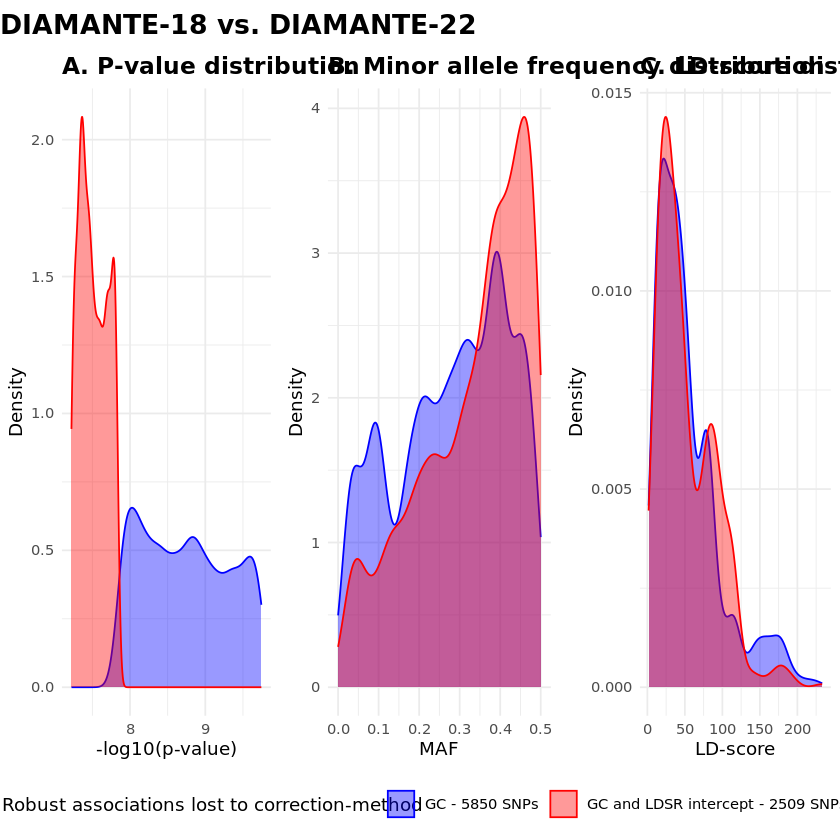

In [8]:
pvalue1 <- ggplot(pvalues_df, aes(x = -log10(pvalue), fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "A. P-value distribution",
    x = "-log10(p-value)",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

ld1 <- ggplot(ld_df, aes(x = ld, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "C. LD-score distribution",
    x = "LD-score",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

maf_1 <- ggplot(MAF_df, aes(x = MAF, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "B. Minor allele frequency distribution",
    x = "MAF",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

# Extract legend
legend <- get_legend(
  pvalue1 + theme(legend.position = "bottom")  
)

# Combine plots in a grid layout
combined_plots <- plot_grid(pvalue1, maf_1, ld1, ncol = 3, align = "h", labels = NULL)

# Create the main title separately
main_title <- ggdraw() + draw_label("DIAMANTE-18 vs. DIAMANTE-22", x = 0, hjust = 0, fontface = "bold", size = 16)

# Combine title, plots, and legend
final_plot <- plot_grid(main_title, combined_plots, legend, ncol = 1, rel_heights = c(0.2, 3, 0.3))

# Save final plot
final_plot
ggsave("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/plots_for_manuscript/final_plots/DIAMANTE-18_DIAMANTE-22_combined_plot_new.pdf", plot = final_plot, width = 12, height = 6, dpi = 600)

#### The plot doesn't look good here but it looks fine in the pdf version 

#### DIAMANTE-18 vs. T2DGGI-24

In [9]:
#p-values
# Combine into a single data frame
length(uniq_unrep_diam18_t2dggi_gc$Pvalue)
length(unrep_diam18_t2dggi_ldsr$Pvalue)
pvalues_df <- data.frame(
  pvalue = c(uniq_unrep_diam18_t2dggi_gc$Pvalue, unrep_diam18_t2dggi_ldsr$Pvalue),
  group = c(rep("GC - 5820 SNPs", length(uniq_unrep_diam18_t2dggi_gc$Pvalue)), rep("GC and LDSR intercept - 3117 SNPs", length(unrep_diam18_t2dggi_ldsr$Pvalue)))
)
t.test(uniq_unrep_diam18_t2dggi_gc$Pvalue, unrep_diam18_t2dggi_ldsr$Pvalue)

#ld score
ld_df <- data.frame(
  ld = c(uniq_unrep_diam18_t2dggi_gc_ld$L2, unrep_diam18_t2dggi_ldsr_ld$L2),
  group = c(rep("GC - 5820 SNPs", length(uniq_unrep_diam18_t2dggi_gc_ld$L2)), rep("GC and LDSR intercept - 3117 SNPs", length(unrep_diam18_t2dggi_ldsr_ld$L2)))
)
t.test(uniq_unrep_diam18_t2dggi_gc_ld$L2, unrep_diam18_t2dggi_ldsr_ld$L2)

#EAF
MAF_df <- data.frame(
  MAF = c(uniq_unrep_diam18_t2dggi_gc$MAF, unrep_diam18_t2dggi_ldsr$MAF),
  group = c(rep("GC - 5820 SNPs", length(uniq_unrep_diam18_t2dggi_gc$MAF)), rep("GC and LDSR intercept - 3117 SNPs", length(unrep_diam18_t2dggi_ldsr$MAF)))
)
t.test(uniq_unrep_diam18_t2dggi_gc$MAF, unrep_diam18_t2dggi_ldsr$MAF)


[1] 5820

[1] 3117


	Welch Two Sample t-test

data:  uniq_unrep_diam18_t2dggi_gc$Pvalue and unrep_diam18_t2dggi_ldsr$Pvalue
t = -124.29, df = 3399.9, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.00000003155223 -0.00000003057220
sample estimates:
        mean of x         mean of y 
0.000000003779297 0.000000034841514 



	Welch Two Sample t-test

data:  uniq_unrep_diam18_t2dggi_gc_ld$L2 and unrep_diam18_t2dggi_ldsr_ld$L2
t = 0.32372, df = 1473.1, p-value = 0.7462
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.301976  4.607254
sample estimates:
mean of x mean of y 
 54.51356  53.86092 



	Welch Two Sample t-test

data:  uniq_unrep_diam18_t2dggi_gc$MAF and unrep_diam18_t2dggi_ldsr$MAF
t = -12.321, df = 6387.2, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04411893 -0.03200659
sample estimates:
mean of x mean of y 
0.2777345 0.3157972 


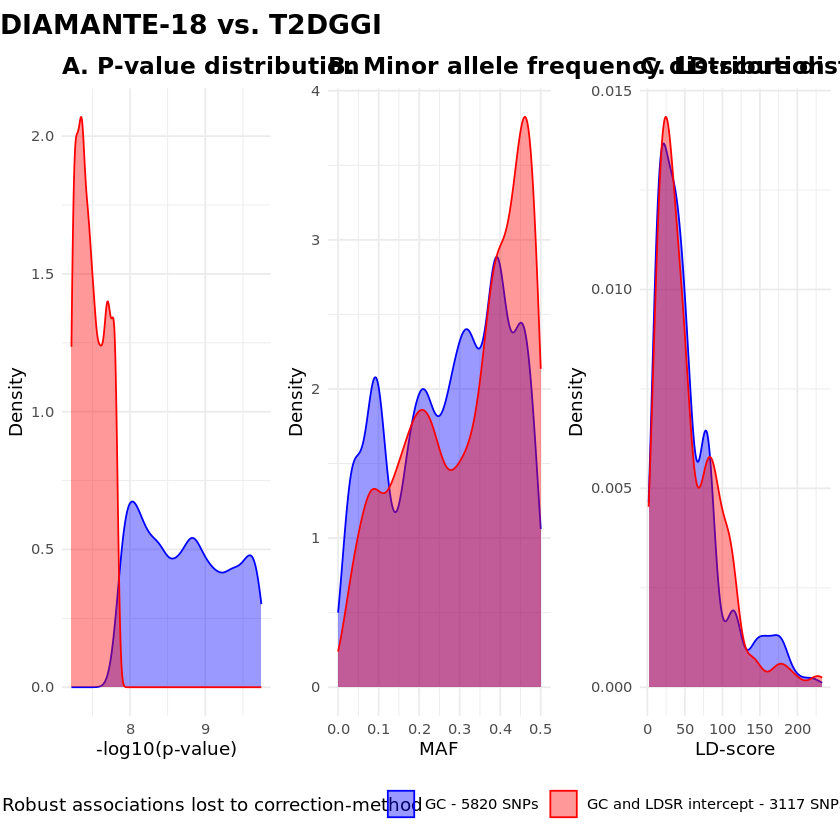

In [10]:
# Define individual plots with simpler titles
pvalue1 <- ggplot(pvalues_df, aes(x = -log10(pvalue), fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "A. P-value distribution",
    x = "-log10(p-value)",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

ld1 <- ggplot(ld_df, aes(x = ld, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "C. LD-score distribution",
    x = "LD-score",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

maf_1 <- ggplot(MAF_df, aes(x = MAF, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "B. Minor allele frequency distribution",
    x = "MAF",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

# Extract legend
legend <- get_legend(
  pvalue1 + theme(legend.position = "bottom")  
)

# Combine plots in a grid layout
combined_plots <- plot_grid(pvalue1, maf_1, ld1, ncol = 3, align = "h", labels = NULL)

# Create the main title separately
main_title <- ggdraw() + draw_label("DIAMANTE-18 vs. T2DGGI", x = 0, hjust = 0, fontface = "bold", size = 16)

# Combine title, plots, and legend
final_plot <- plot_grid(main_title, combined_plots, legend, ncol = 1, rel_heights = c(0.2, 3, 0.3))

# Display and save final plot
print(final_plot)
ggsave("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/plots_for_manuscript/final_plots/DIAMANTE-18_T2DGGI_combined_plot.pdf", plot = final_plot, width = 12, height = 6, dpi = 600)

#### DIAMANTE-22 vs. T2DGGI-24

In [11]:
#p-values
# Combine into a single data frame
length(uniq_unrep_diam22_t2dggi_gc$`Fixed-effects_p-value`)
length(unrep_diam22_t2dggi_ldsr$`Fixed-effects_p-value`)
pvalues_df <- data.frame(
  pvalue = c(uniq_unrep_diam22_t2dggi_gc$`Fixed-effects_p-value`, unrep_diam22_t2dggi_ldsr$`Fixed-effects_p-value`),
  group = c(rep("GC - 6974 SNPs", length(uniq_unrep_diam22_t2dggi_gc$`Fixed-effects_p-value`)), rep("GC and LDSR intercept - 3041 SNPs", length(unrep_diam22_t2dggi_ldsr$`Fixed-effects_p-value`)))
)
t.test(uniq_unrep_diam22_t2dggi_gc$`Fixed-effects_p-value`, unrep_diam22_t2dggi_ldsr$`Fixed-effects_p-value`)

#ld score
ld_df <- data.frame(
  ld = c(uniq_unrep_diam22_t2dggi_gc_ld$L2, unrep_diam22_t2dggi_ldsr_ld$L2),
  group = c(rep("GC - 6974 SNPs", length(uniq_unrep_diam22_t2dggi_gc_ld$L2)), rep("GC and LDSR intercept - 3041 SNPs", length(unrep_diam22_t2dggi_ldsr_ld$L2)))
)
t.test(uniq_unrep_diam22_t2dggi_gc_ld$L2, unrep_diam22_t2dggi_ldsr_ld$L2)

#EAF
MAF_df <- data.frame(
  MAF = c(uniq_unrep_diam22_t2dggi_gc$MAF, unrep_diam22_t2dggi_ldsr$MAF),
  group = c(rep("GC - 6974 SNPs", length(uniq_unrep_diam22_t2dggi_gc$MAF)), rep("GC and LDSR intercept - 3041 SNPs", length(unrep_diam22_t2dggi_ldsr$MAF)))
)
t.test(uniq_unrep_diam22_t2dggi_gc$MAF, unrep_diam22_t2dggi_ldsr$MAF)


[1] 6974

[1] 3041


	Welch Two Sample t-test

data:  uniq_unrep_diam22_t2dggi_gc$`Fixed-effects_p-value` and unrep_diam22_t2dggi_ldsr$`Fixed-effects_p-value`
t = -125.21, df = 3427.3, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.00000009394837 -0.00000009105157
sample estimates:
       mean of x        mean of y 
0.00000001561243 0.00000010811240 



	Welch Two Sample t-test

data:  uniq_unrep_diam22_t2dggi_gc_ld$L2 and unrep_diam22_t2dggi_ldsr_ld$L2
t = 5.1626, df = 1466.9, p-value = 0.0000002769
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.185012 13.765366
sample estimates:
mean of x mean of y 
 57.88873  47.91354 



	Welch Two Sample t-test

data:  uniq_unrep_diam22_t2dggi_gc$MAF and unrep_diam22_t2dggi_ldsr$MAF
t = 1.6414, df = 5584.8, p-value = 0.1008
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0009713915  0.0109680315
sample estimates:
mean of x mean of y 
0.3008941 0.2958958 


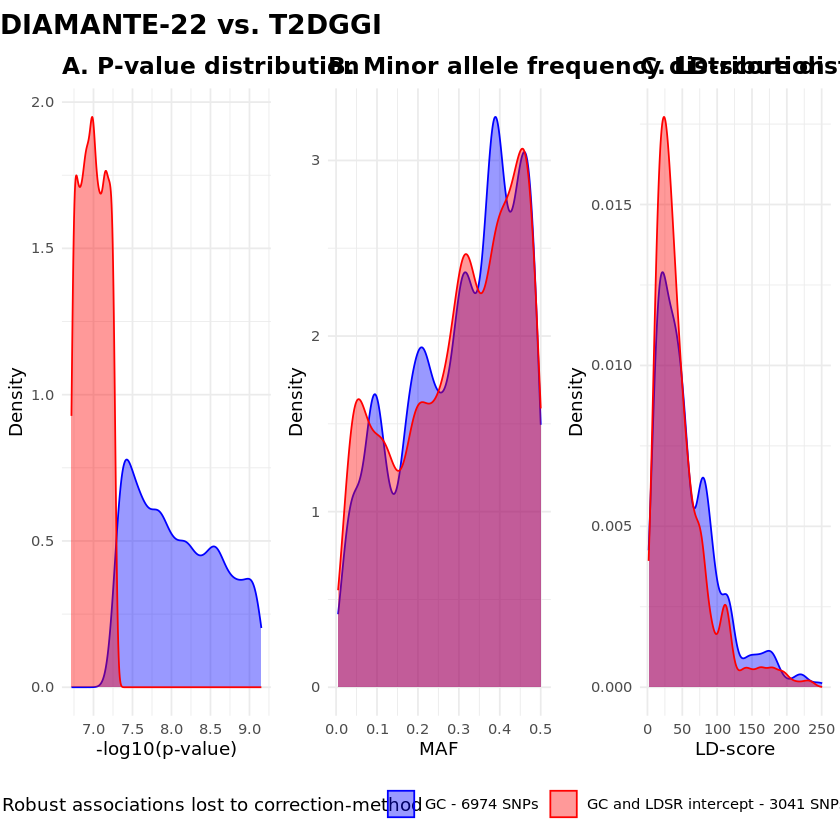

In [12]:
# Define individual plots with simplified panel titles
pvalue1 <- ggplot(pvalues_df, aes(x = -log10(pvalue), fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "A. P-value distribution",
    x = "-log10(p-value)",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

ld1 <- ggplot(ld_df, aes(x = ld, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "C. LD-score distribution",
    x = "LD-score",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

maf_1 <- ggplot(MAF_df, aes(x = MAF, fill = group, color = group)) +
  geom_density(alpha = 0.4) +
  labs(
    title = "B. Minor allele frequency distribution",
    x = "MAF",
    y = "Density",
    fill = "Robust associations lost to correction-method",
    color = "Robust associations lost to correction-method"
  ) +
  scale_fill_manual(values = c("blue", "red")) +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"), legend.position = "none")

# Extract legend
legend <- get_legend(
  pvalue1 + theme(legend.position = "bottom")  
)

# Combine plots in a grid layout
combined_plots <- plot_grid(pvalue1, maf_1, ld1, ncol = 3, align = "h", labels = NULL)

# Create the main title separately
main_title <- ggdraw() + draw_label("DIAMANTE-22 vs. T2DGGI", x = 0, hjust = 0, fontface = "bold", size = 16)

# Combine title, plots, and legend
final_plot <- plot_grid(main_title, combined_plots, legend, ncol = 1, rel_heights = c(0.2, 3, 0.3))

# Display and save final plot
print(final_plot)
ggsave("/lustre/groups/itg/teams/zeggini/users/archit.singh/lambda/plots_for_manuscript/final_plots/DIAMANTE-22_T2DGGI_combined_plot_new.pdf", plot = final_plot, width = 12, height = 6, dpi = 600)
